In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Python - ordinary exam - employee-attrition-data.xlsx')
#showing the first 5 rows
df.head()

,index_column,employee_age,attrition,travel_in_job,employee_department,distance_from_home,employee_education,workplace_satisfaction,gender,employee_job_involvement,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_current_manager
0,1,41,Yes,rarely,Sales Department,1,2,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,2,49,No,frequently,R&D Department,8,1,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,3,37,Yes,rarely,R&D Department,2,2,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,4,33,No,frequently,R&D Department,3,4,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,5,27,No,rarely,R&D Department,2,1,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


## 1- Exploratory data analysis

In [2]:
#checking for null values
df.isnull().sum()

index_column                  0
employee_age                  0
attrition                     0
travel_in_job                 0
employee_department           0
distance_from_home            0
employee_education            0
workplace_satisfaction        0
gender                        0
employee_job_involvement      0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
numcompanies_worked           0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at_company              0
years_in_current_role         0
years_since_last_promotion    0
years_with_current_manager    0
dtype: int64

The data has no null values

In [3]:
#shape of the dataframe
df.shape

(2558, 28)

In [4]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index_column                2558 non-null   int64 
 1   employee_age                2558 non-null   int64 
 2   attrition                   2558 non-null   object
 3   travel_in_job               2558 non-null   object
 4   employee_department         2558 non-null   object
 5   distance_from_home          2558 non-null   int64 
 6   employee_education          2558 non-null   int64 
 7   workplace_satisfaction      2558 non-null   int64 
 8   gender                      2558 non-null   object
 9   employee_job_involvement    2558 non-null   int64 
 10  job_level                   2558 non-null   int64 
 11  job_role                    2558 non-null   object
 12  job_satisfaction            2558 non-null   int64 
 13  marital_status              2558 non-null   obje

In [5]:
#checking for duplicates
df.duplicated().value_counts()

False    2558
dtype: int64

In [6]:
#check number of unique values in object type columns
df.select_dtypes(include='object').nunique()

attrition              2
travel_in_job          3
employee_department    3
gender                 2
job_role               9
marital_status         3
over_time              2
dtype: int64

In [7]:
df['attrition'].value_counts()

No     2145
Yes     413
Name: attrition, dtype: int64

In [8]:
df_copy =df.copy()

In [9]:
#let's convert categorical columns to int values to see the correlation with other variables
df_copy['attrition'] = df_copy['attrition'].astype('category').cat.codes
df_copy['gender'] = df_copy['gender'].astype('category').cat.codes
df_copy['over_time'] = df_copy['over_time'].astype('category').cat.codes

df_copy['marital_status'] = df_copy['marital_status'].astype('category').cat.codes
df_copy['travel_in_job'] = df_copy['travel_in_job'].astype('category').cat.codes
df_copy['employee_department'] = df_copy['employee_department'].astype('category').cat.codes
df_copy['job_role'] = df_copy['job_role'].astype('category').cat.codes

In [10]:
df_copy['attrition'].value_counts()

0    2145
1     413
Name: attrition, dtype: int64

There are no duplicates

In [11]:
df_copy.describe()

,index_column,employee_age,attrition,travel_in_job,employee_department,distance_from_home,employee_education,workplace_satisfaction,gender,employee_job_involvement,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_current_manager
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,...,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,1279.500000,36.803753,0.161454,1.515246,1.261923,9.238858,2.922596,2.710711,0.596169,2.741204,...,3.154808,2.730649,0.811181,11.154027,2.809617,2.752932,6.885457,4.112979,2.201329,4.095387
std,738.575318,9.067157,0.368021,0.797166,0.529354,8.118285,1.010441,1.101413,0.490760,0.703274,...,0.361793,1.069252,0.869642,7.781261,1.304348,0.702488,5.983926,3.588555,3.253187,3.609872
min,1.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,640.250000,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1279.500000,35.000000,0.000000,2.000000,1.000000,7.000000,3.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1918.750000,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,4.000000,1.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2558.000000,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,4.000000,1.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


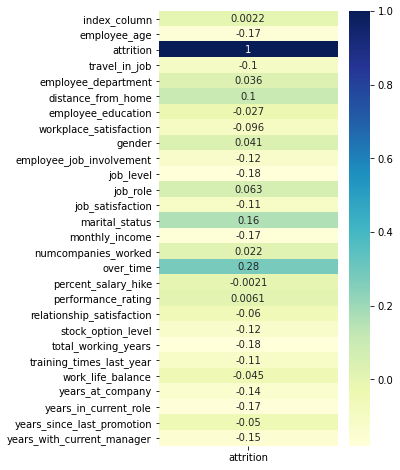

In [12]:
plt.figure(figsize=(4,8))

df_corr = df_copy.corr()['attrition'][:]
sns.heatmap(df_corr.to_frame(),annot=True,cmap="YlGnBu");


we can see some important variables affecting the attrition rate like 


* employee_age
*job_involvement
* job_level
* income
* stock_options
* total_working_years
* years_in_current_role
* years_with_current_manager

which have negative correlation

while 
* martial_status
* over_time

have positive correlation with the attrition

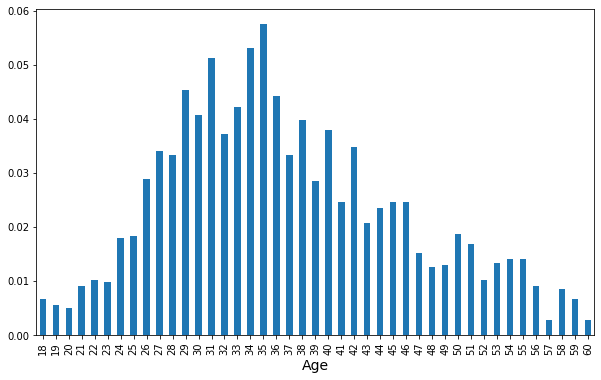

In [13]:
# The Distribution of Age
age_distribution = df['employee_age'].value_counts().sort_index()/len(df)

plt.figure(figsize=(10,6))
age_distribution.plot(kind='bar')
plt.xlabel('Age',fontsize=14);

### The relation between Age and Attrition

<Figure size 720x432 with 0 Axes>

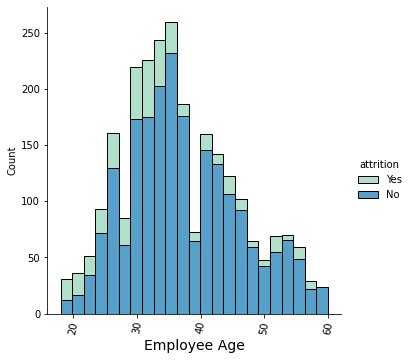

In [14]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="employee_age", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80)
plt.xlabel('Employee Age',fontsize=14)
plt.show();

We can see that employees of age between 25 and 40 have a high attrition rate, while old employees have low attrition rate

### Relation between Attrition and Total Working years

<Figure size 720x432 with 0 Axes>

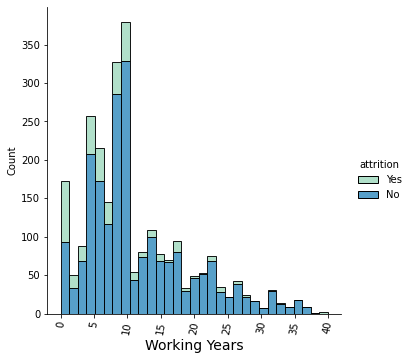

In [15]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="total_working_years", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80)
plt.xlabel('Working Years',fontsize=14)
plt.show();

So Employees with working years less than 10 years have a high chance to leave while the attrition rate decreases as working years increases

### Relation between Attrition and Income 

<Figure size 720x432 with 0 Axes>

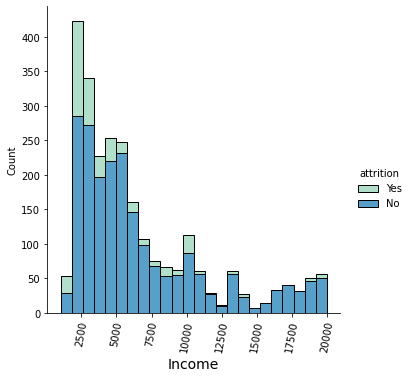

In [16]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="monthly_income", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80)
plt.xlabel('Income',fontsize=14)
plt.show();

It is Obvious that Employees with lower monthly income tend to have higher attirion rate than those with higher income

### Relation between Attrition and Employee Department

<Figure size 720x432 with 0 Axes>

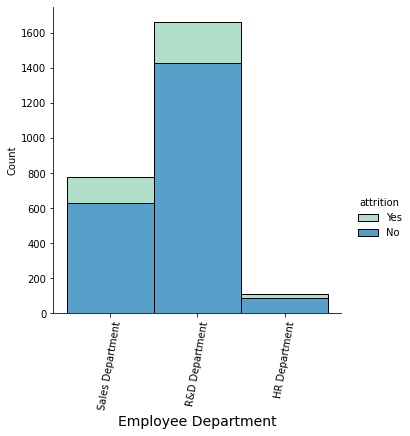

In [17]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="employee_department", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80)
plt.xlabel('Employee Department',fontsize=14)
plt.show();

In [18]:
dep_attr = df.groupby('employee_department')['attrition'].value_counts().unstack()

dep_attr['attr_ratio'] = (dep_attr.Yes/(dep_attr.Yes+dep_attr.No)).round(2)
dep_attr = dep_attr.reset_index()
dep_attr.index.names = ['index']
dep_attr

attrition,employee_department,No,Yes,attr_ratio
index,,,,
0,HR Department,87,24,0.22
1,R&D Department,1427,239,0.14
2,Sales Department,631,150,0.19


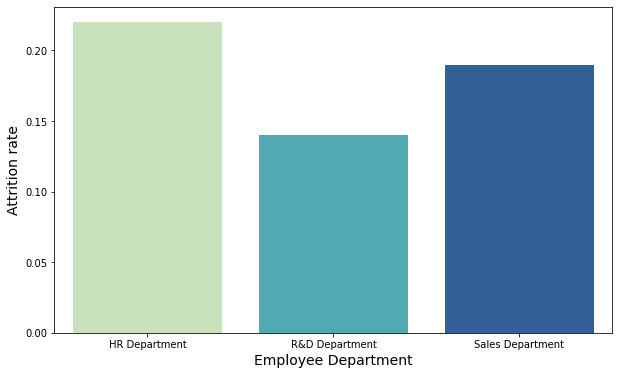

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data = dep_attr ,x ='employee_department' , y ='attr_ratio',palette='YlGnBu')
plt.ylabel('Attrition rate',fontsize=14)
plt.xlabel('Employee Department',fontsize=14);


It looks the department with the most attrition rate is HR Department while R&D Department have the lowest attrition

### Relation between Attrition and Gender

<Figure size 720x576 with 0 Axes>

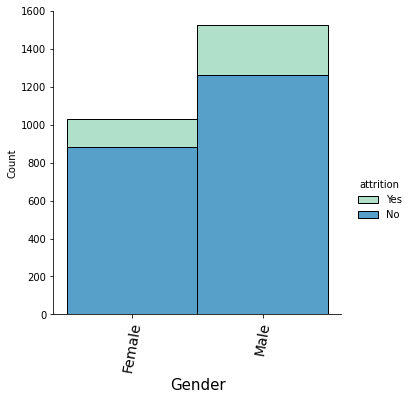

In [20]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="gender", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80,fontsize=14)
plt.xlabel('Gender',fontsize=15)
plt.show();

In [21]:
gender_attr = df.groupby('gender')['attrition'].value_counts().unstack()
gender_attr['attr_ratio'] = (gender_attr.Yes/(gender_attr.Yes+gender_attr.No)).round(2)
gender_attr = gender_attr.reset_index()
gender_attr.index.names = ['index']
gender_attr

attrition,gender,No,Yes,attr_ratio
index,,,,
0,Female,885,148,0.14
1,Male,1260,265,0.17


The ratio of male attrition is slightly higher than females 

### Relation between Attrition and Job role

<Figure size 720x576 with 0 Axes>

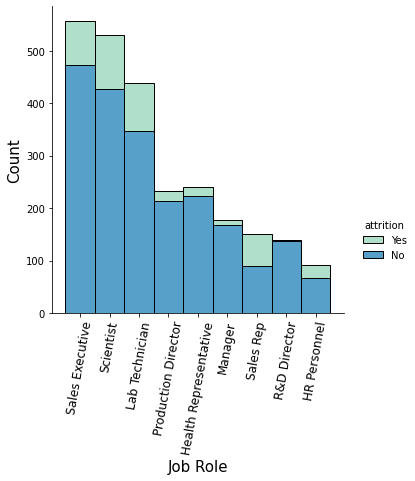

In [22]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="job_role", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80,fontsize=12)
plt.xlabel('Job Role',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show();


In [23]:
role_attr = df.groupby('job_role')['attrition'].value_counts().unstack()
role_attr['attr_ratio'] = (role_attr.Yes/(role_attr.Yes+role_attr.No)).round(2)
role_attr = role_attr.reset_index()
role_attr.index.names = ['index']
role_attr

attrition,job_role,No,Yes,attr_ratio
index,,,,
0,HR Personnel,67,24,0.26
1,Health Representative,223,18,0.07
2,Lab Technician,347,92,0.21
3,Manager,168,10,0.06
4,Production Director,214,18,0.08
5,R&D Director,137,3,0.02
6,Sales Executive,473,84,0.15
7,Sales Rep,89,61,0.41
8,Scientist,427,103,0.19


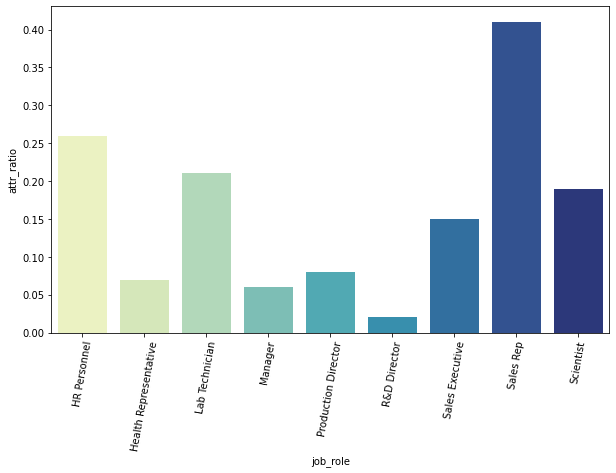

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data = role_attr ,x ='job_role' , y ='attr_ratio',palette='YlGnBu')
plt.xticks(rotation=80);


we can see that the attrition rate for Sales Rep, scientists and HR Personnel are very high while R&D Directors have nearly zero attritions

### Relation between Attrition and Marital Status

<Figure size 720x576 with 0 Axes>

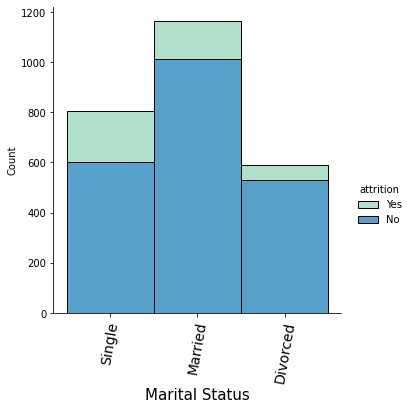

In [25]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="marital_status", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80,fontsize=14)
plt.xlabel('Marital Status',fontsize=15)
plt.show();

So the divorced employees tend to stay at their jobs with low attrition rate while singles employees have high Attrition rate

Let's investigate the effect of Over time on Attrition

### Relation between Attrition and Over Time

<Figure size 720x576 with 0 Axes>

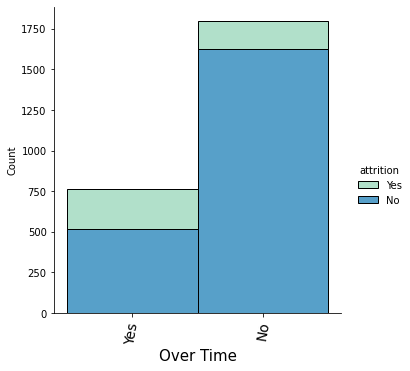

In [26]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="over_time", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80,fontsize=14)
plt.xlabel('Over Time',fontsize=15)
plt.show();

We can see that employees that do over time have higher attrition rate than others

And now Let's investigate the effect of Travel in Job on Attrition

### Relation between Attrition and Travel in job

<Figure size 720x576 with 0 Axes>

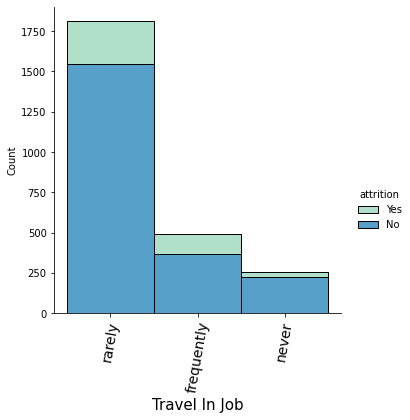

In [27]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="travel_in_job", hue="attrition", multiple="stack",palette ="YlGnBu" )
plt.xticks(rotation=80,fontsize=14)
plt.xlabel('Travel In Job',fontsize=15)
plt.show();

In [28]:
travel_attr = df.groupby('travel_in_job')['attrition'].value_counts().unstack()
travel_attr['attr_ratio'] = (travel_attr.Yes/(travel_attr.Yes+travel_attr.No)).round(2)
travel_attr = travel_attr.reset_index()
travel_attr.index.names = ['index']
travel_attr

attrition,travel_in_job,No,Yes,attr_ratio
index,,,,
0,frequently,369,124,0.25
1,never,227,27,0.11
2,rarely,1549,262,0.14


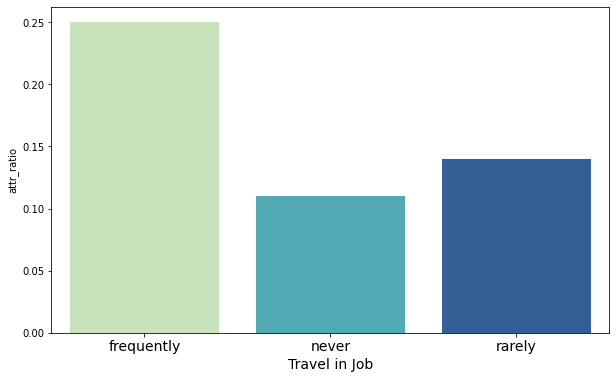

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data = travel_attr ,x ='travel_in_job' , y ='attr_ratio',palette='YlGnBu')
plt.xticks(fontsize=14)
plt.xlabel('Travel in Job',fontsize=14);

So employees who travel frequently have a higher Attrition rate than those who rarely or never travel

## 2- Supervised Machine-Learning to predict Attritions

In [45]:
#importing the sklearn classifiers packages 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,f1_score , confusion_matrix

In [46]:
feature_columns = ['employee_age','over_time','marital_status','total_working_years','job_level',
                   'monthly_income','years_in_current_role']

#numerical_variables=['employee_age','total_working_years','job_level','monthly_income','years_in_current_role']

X = pd.get_dummies(df[feature_columns])
y = df['attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.25,
                                                   random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1918 samples.
Testing set has 640 samples.


In [69]:
def model_evaluate(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,preds)
    f1_s = f1_score(y_test,preds,average = 'weighted')
    cm = confusion_matrix(y_test,preds)
    
    return accuracy ,f1_s , cm

In [70]:
svm_classifier = SVC(random_state = 42)
rf_classifier = RandomForestClassifier(random_state = 42)
dt_classifier = DecisionTreeClassifier(random_state = 42)

In [73]:
for model in [svm_classifier,rf_classifier,dt_classifier]:
    acc ,f1_s, cm = model_evaluate(model, X_train, y_train, X_test, y_test)
    print(f'Accuracy of {model} is : {acc} \n and f1_score is : {f1_s} \n and confusion_matrix is \n {cm} \n')

Accuracy of SVC(random_state=42) is : 0.828125 
 and f1_score is : 0.750267094017094 
 and confusion_matrix is 
 [[530   0]
 [110   0]] 

Accuracy of RandomForestClassifier(random_state=42) is : 0.9328125 
 and f1_score is : 0.9282569568717598 
 and confusion_matrix is 
 [[524   6]
 [ 37  73]] 

Accuracy of DecisionTreeClassifier(random_state=42) is : 0.890625 
 and f1_score is : 0.8910143011631669 
 and confusion_matrix is 
 [[494  36]
 [ 34  76]] 



As we see the accuracy of the models are higher than 0.82 and the f1_score is higher than 0.89 except with the svm classifier with 0.75 but still good as it conveys the balance between the precision and the recall.

and the confusion matrix of SVM gives a large number of false negatives and 0 false positives, while with RandomForest 
it gives a very good results with only 6 false positives and 37 false negatives ,and with DecisionTree it gives 36 false positives and 34 false negatives.

From the results above we can say that the RandomForest Classifier is the best model for this job with the highest accuracy 0.93 and highest f1-score 0.92 and good confusion matrix resuls.

In [81]:
#investigating the features importance in the model
important_features = pd.Series(data=rf_classifier.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

monthly_income             0.318147
employee_age               0.201976
total_working_years        0.161195
years_in_current_role      0.109303
job_level                  0.050422
over_time_Yes              0.049584
over_time_No               0.040792
marital_status_Single      0.034818
marital_status_Married     0.017152
marital_status_Divorced    0.016611
dtype: float64

And as see the monthly income has a very large impact on attrition rate followed by the employee age and the total_working_hours and years in the current role